# PSET1 - Object Oriented Programming

This problem set has only one part. You will be graded based on:

- Correct completion of the task.
- Your code is readable.
- Your names are logical and clear.

Hint: Build this problem set piece by piece.

## Problem description:

You work on a team of data scientists that regularly perform analysis and create many charts. Your boss has asked you to create a reusable piece of code that can perform most of this plotting without having to retype a lot of code. 

There are several functions you should make to perform this plotting, and you should encapuslate it all in a class called **Plot** that **takes your dataframe as input**. Here are the plotting functions it should have:

- **Box plots of all numeric features** - This function should find all the numeric features in your dataframe and construct a faceted plot (a grid or subplots). Each subplotplot should have the feature labeled and the larger plot should have a title.

- **Single scatter plot of two columns** - This function should take 2 column names and build a scatter plot for them. The axes labels and title should be auto generated.

- **Scatter matrix with extras** - This function should plot a scatter matrix with histograms plotted along the diagonal. In addition to the scatter matrix, the function should tell which columns were not able to be included in the scatter matrix. 


Note: You can use Matplotlib, Plotly, or Seaborn for this PSET. Also, each function should include **at least a basic docstring**.

## Demostrate completion:

In order to complete the PSET you will need to create your Class and then **demonstrate its usage**. Once you have created your class and functions, you should demonstrate their usage on the Titanic dataset in this repository's data directory.

Good luck!

In [57]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

### Loading the Titanic dataset 

In [58]:
titanic = pd.read_csv("data/titanic.csv")

In [60]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
#Creating class called Plot
class Plot:
    def __init__(self, df):
        self.df = df

    #Creating box plots for each numeric columns        
    def box_plots_numeric(self):
        
       #Identifying the numeric columns and number of numeric columns in the dataset
        numeric_columns = self.df.select_dtypes(include='number').columns
        num_cols = len(numeric_columns)
        fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 5*num_cols))
        
        #Creating numeric columns using Seaborn's boxplot 
        for i, col in enumerate(numeric_columns):
            sns.boxplot(data=self.df, x=col, ax=axes[i] if num_cols > 1 else axes)
            axes[i].set_title(f'Box Plot of {col}')

        plt.tight_layout()
        plt.show()
    
    #Creating a scatter plot for any two columns
    def scatter_plot(self, col1, col2):
       
        plt.figure(figsize=(8,6))
        #Setting the x-axis and y-axis to identify relationship between two variables
        sns.scatterplot(x=self.df[col1], y=self.df[col2])
        plt.title(f"Scatter Plot: {col1} vs {col2}")
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()
        
    #Creating scatter matrix for all numeric features
    def scatter_matrix(self):
        #Identifying the numeric columns
        numeric_columns = self.df.select_dtypes(include='number')
        #If no numeric columns exist, print "No numeric columns to plot"
        if numeric_columns.empty:
            print("No numeric columns to plot.")
            return

        scatter_matrix(numeric_columns, figsize=(12, 12), diagonal='hist')
        plt.suptitle('Scatter Matrix of Numeric Features', fontsize=16)
        plt.show()
        #Finding the non numeric columns and printing lists of which ones were excluded
        non_numeric_columns = self.df.select_dtypes(exclude='number').columns
        if non_numeric_columns.any():
            print(f"Columns not included in the scatter matrix: {list(non_numeric_columns)}")


In [62]:
#Using the Plot class to work with the Titanic dataset
plot = Plot(titanic)

### Box Plots of all numeric features

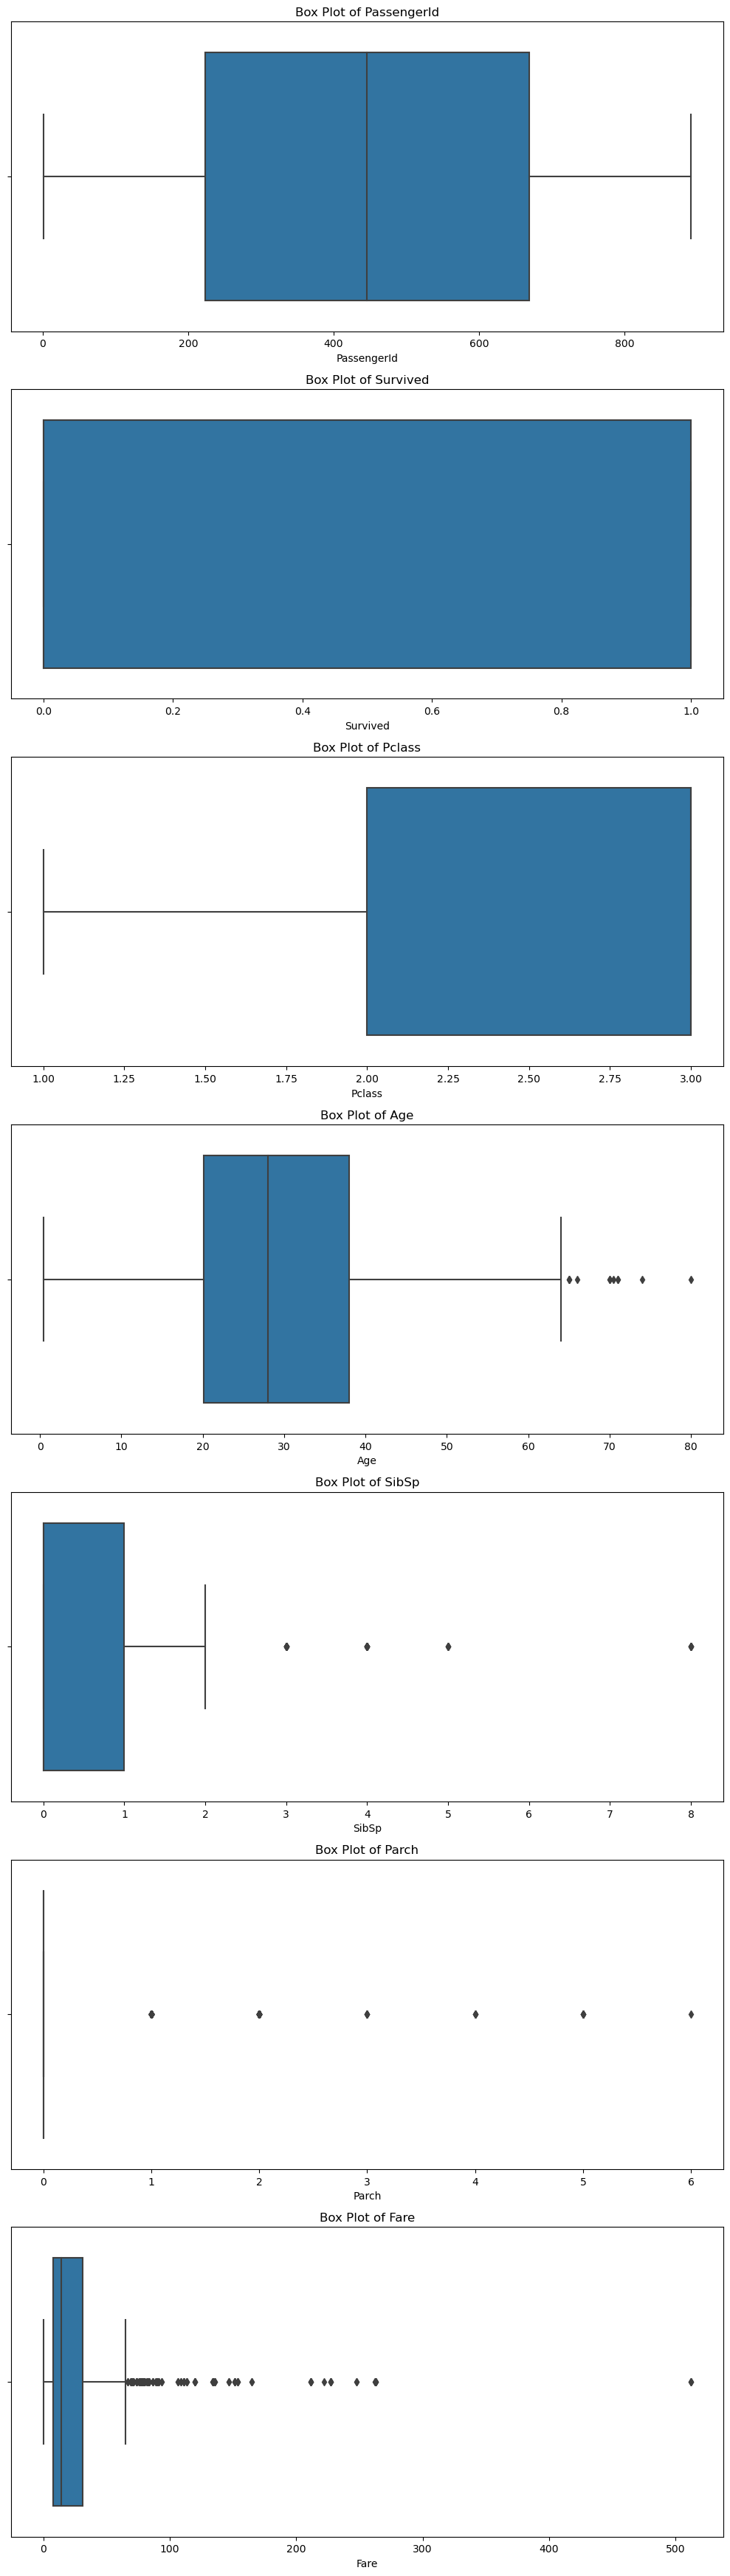

In [63]:
# Box plots of all numeric features
plot.box_plots_numeric()

### Single Scatter Plot of Age vs Survived

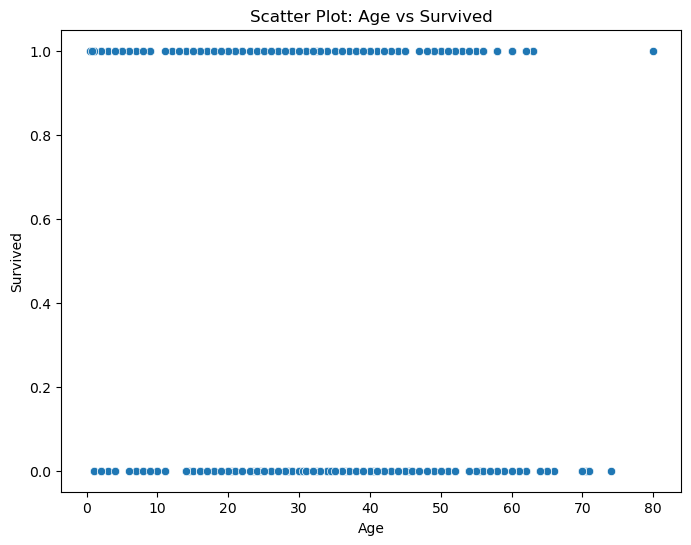

In [64]:
#Single scatter plot of two columns
plot.scatter_plot('Age', 'Survived')

### Scatter Matrix

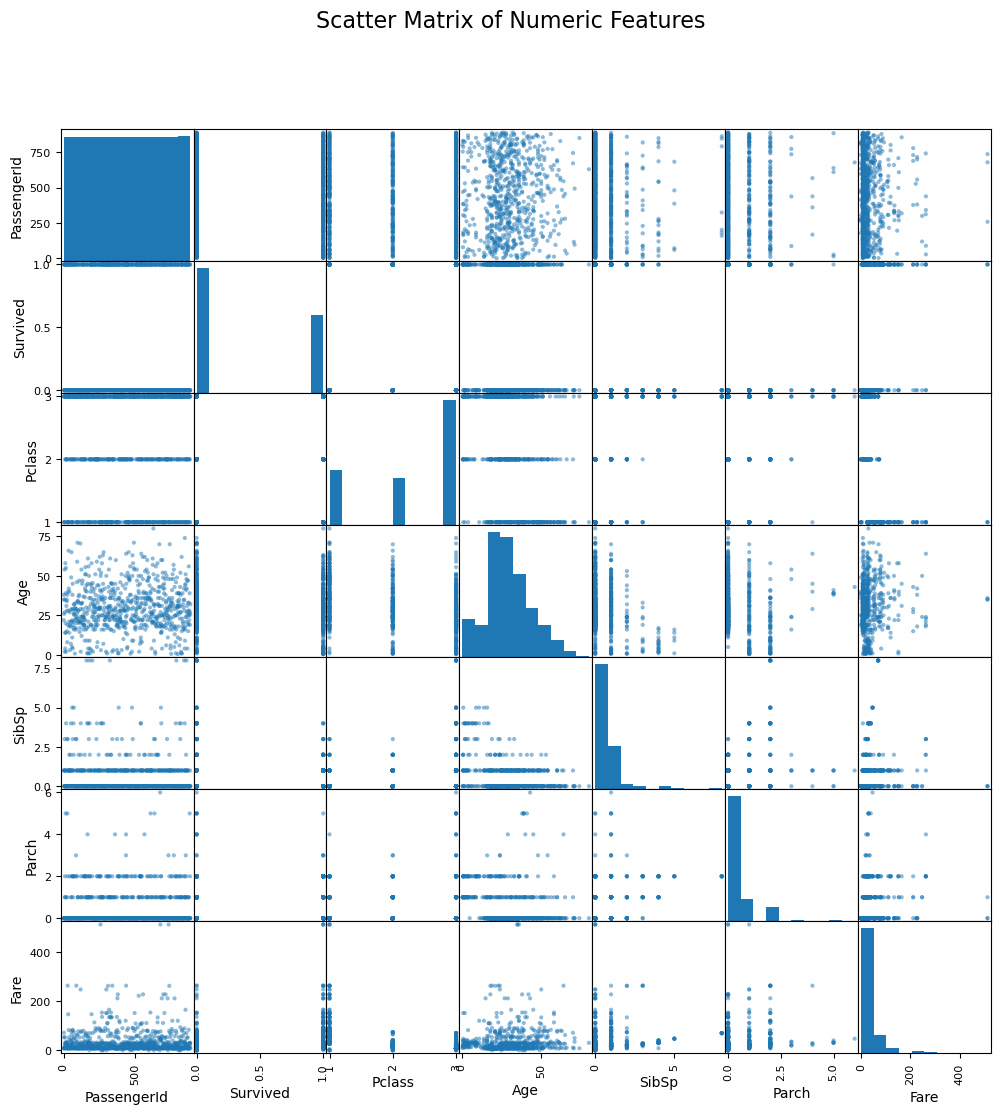

Columns not included in the scatter matrix: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [65]:
#Scatter Matrix with histograms
plot.scatter_matrix()